In [2]:
#imported packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
%matplotlib inline

print("packages imported")

packages imported


# Problem Statement

Model the total sleep duration of 374 people using linear regression, given the number of minutes engaged in physical activity, self-reported stress level (1-10), and self-reported sleep quality (1-10).

# Variables and Parameters

| Symbol | Description | Type | Dimension | Units |
|---|---|---|---|---|
| $Y$ | The total number of hours slept | dependent variable | $T$ | hours |
| $B_0$ | The default sleeping duration $d$ | parameter | $T$ | hours |
| $B_1$ | Regression coefficient for physical activity | parameter | $T$ | hours/minutes |
| $X_1$ | The number of minutes (minutes) engaged in physical activity during the day | independent variable | $T$ | minutes |
| $B_2$ | Regression coefficient for stress level | parameter | $T$ | hours |
| $X_2$ | The (self-reported) stress level experienced | independent variable | 1 |  |
| $B_3$ | Regression coefficient for quality of sleep | parameter | $T$ | hours |
| $X_3$ | The (self-reported) quality of sleep reported on a scale of 1 to 10 | independent variable | 1 |  |
| $\epsilon$ | residual | parameter | $T$ | hours |


# Assumptions and Constraints:

- Other variables that affect sleep duration, such as timezone, room temperature, and diet, are constant.
- Assume that the data comes from 374 people of working age with no sleep-related diseases.
- No other variables affect sleep duration


# Building the Solution:

In [3]:
sleep_data = pd.read_csv('Sleep.csv')
sleep = pd.DataFrame(sleep_data)
sleep.head()

,Duration,Quality,Physical_Activity,Stress
0,6.1,6,42,6
1,6.2,6,60,8
2,6.2,6,60,8
3,5.9,4,30,8
4,5.9,4,30,8


In [4]:
X = sleep[['Physical_Activity','Stress','Quality']]
Y = sleep['Duration']
X = sm.add_constant(X)
reg = sm.OLS(Y, X).fit()
betas = reg.params
x1 = sleep['Physical_Activity']; x2 = sleep['Stress']; x3 = sleep['Quality']
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Duration   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     450.5
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          4.13e-123
Time:                        20:30:42   Log-Likelihood:                -157.20
No. Observations:                 374   AIC:                             322.4
Df Residuals:                     370   BIC:                             338.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.6737      0.402      9.132      0.000       2.883       4.465
Physical_Activity     0.0024      0.001      2.434      0.015       0.000       0.004
Stress               -0.0607      0.026     -2.331      0.020      -0.112      -0.009
Quality               0.4981      0.039     12.663      0.000       0.421       0.575
==============================================================================
Omnibus:                       31.756   Durbin-Watson:                   0.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.774
Skew:                           0.729   Prob(JB):                     1.71e-08
Kurtosis:                       2.590   Cond. No.                     1.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Assumption: Average of errors is zero

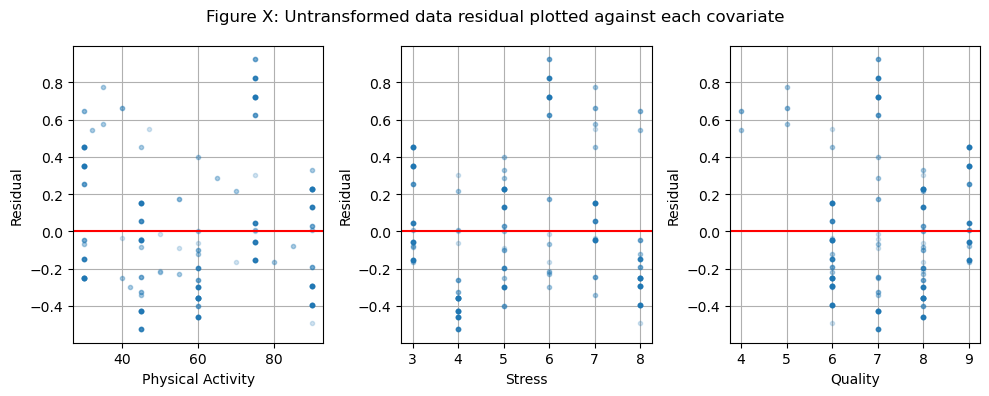

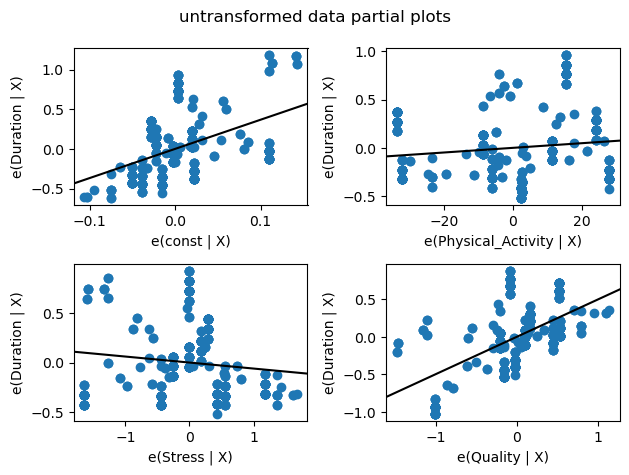

In [5]:
residuals = Y - (betas.iloc[0] + betas.iloc[1]*x1 + betas.iloc[2]*x2 + betas.iloc[3]*x3)
fig, axes = plt.subplots(1, 3, figsize=(10,4))

def residualPlot(ax, var, label):
    ax.plot(var, residuals, '.', alpha=0.2), ax.grid(True)
    ax.set_xlabel(label), ax.set_ylabel('Residual')
    ax.axhline(y=0, color='r')

residualPlot(axes[0], x1, 'Physical Activity')
residualPlot(axes[1], x2, 'Stress')
residualPlot(axes[2], x3, 'Quality')

plt.suptitle('Figure X: Untransformed data residual plotted against each covariate')
plt.tight_layout()
plt.show()

## partial regression plots
sm.graphics.plot_partregress_grid(reg)
plt.suptitle('untransformed data partial plots')
plt.subplots_adjust(top=0.9)
plt.show()

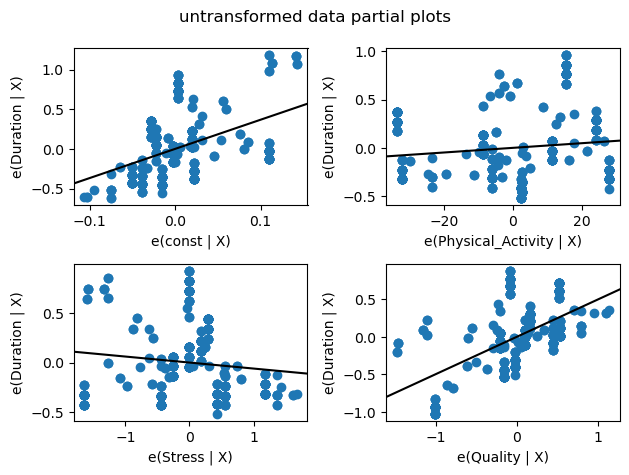

In [66]:
## partial regression plots
sm.graphics.plot_partregress_grid(reg)
plt.suptitle('untransformed data partial plots')
plt.subplots_adjust(top=0.9)
plt.show()

### Assumption: Variance of errors is constant

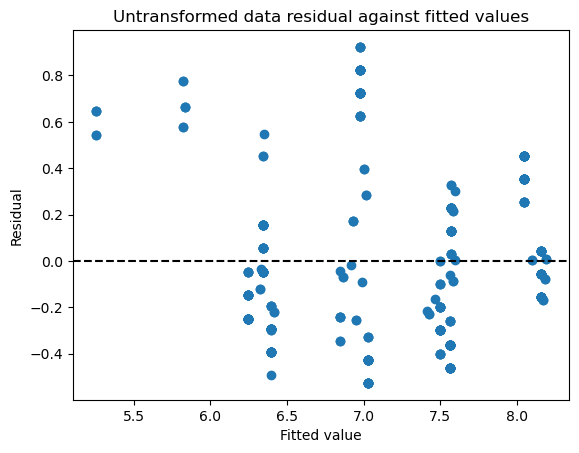

In [68]:
fitted_y = reg.fittedvalues
residuals = reg.resid

plt.scatter(fitted_y,residuals)
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.title('Untransformed data residual against fitted values')
plt.show()

### Assumption: Errors are normally distributed

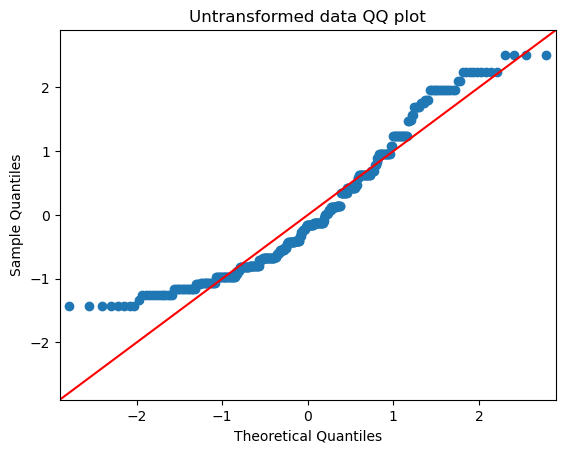

In [69]:
residuals = reg.resid

sm.qqplot(residuals,fit=True, line="45")
plt.title('Untransformed data QQ plot')
plt.show()

## Transformations

In [6]:
stress_sqrt = np.sqrt(sleep['Stress'])
stress_squared = sleep['Stress']**2
quality_log = np.log(sleep['Quality'])
quality_squared = sleep['Quality']**2
physical_log = np.log(sleep['Physical_Activity'])
physical_sqrt = np.sqrt(sleep['Physical_Activity'])
physical_squared = sleep['Physical_Activity']**2

## Square root stress values

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     448.0
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          9.10e-123
Time:                        04:20:59   Log-Likelihood:                -158.00
No. Observations:                 374   AIC:                             324.0
Df Residuals:                     370   BIC:                             339.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.8113      0.54

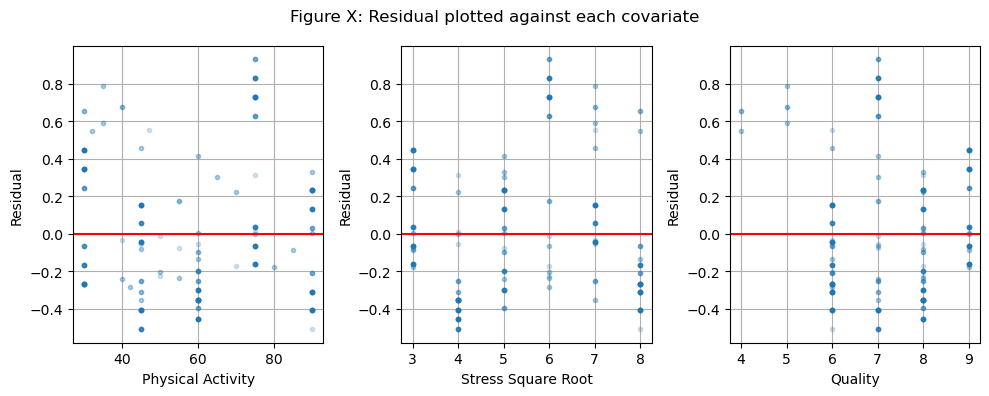

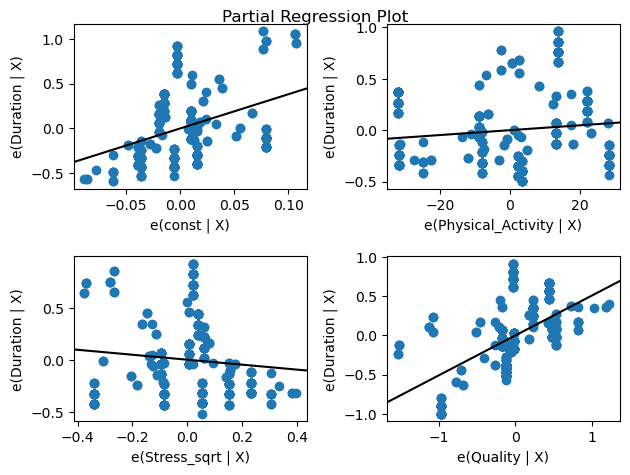

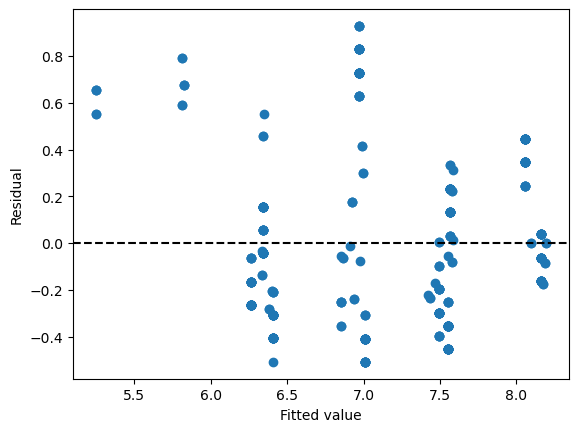

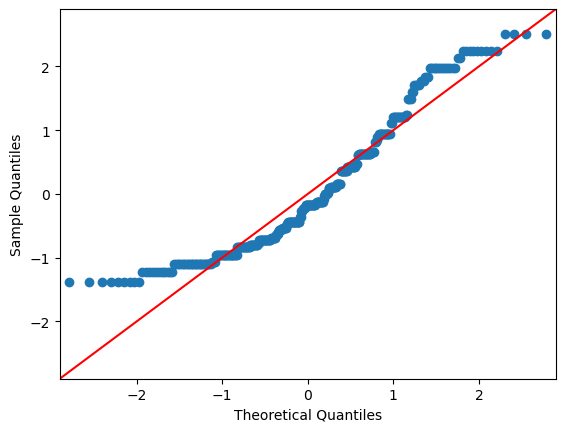

In [71]:
X = sleep[['Physical_Activity','Quality']]
X.insert(1, 'Stress_sqrt', stress_sqrt)
X = sm.add_constant(X)
reg = sm.OLS(Y, X).fit()
print(reg.summary())

betas = reg.params
residuals = Y - (betas.iloc[0] + betas.iloc[1]*x1 + betas.iloc[2]*stress_sqrt + betas.iloc[3]*x3)

## residual covariate plot
fig, axes = plt.subplots(1, 3, figsize=(10,4))
residualPlot(axes[0], x1, 'Physical Activity')
residualPlot(axes[1], x2, 'Stress Square Root')
residualPlot(axes[2], x3, 'Quality')

plt.suptitle('Figure X: Residual plotted against each covariate')
plt.tight_layout()
plt.show()

## partial regression plots
sm.graphics.plot_partregress_grid(reg)
plt.show()

fitted_y = reg.fittedvalues
residuals = reg.resid

plt.scatter(fitted_y,residuals)
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

residuals = reg.resid

sm.qqplot(residuals,fit=True, line="45")
plt.show()

## Square stress values

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     458.3
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          3.36e-124
Time:                        04:22:02   Log-Likelihood:                -154.67
No. Observations:                 374   AIC:                             317.3
Df Residuals:                     370   BIC:                             333.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.7246      0.31

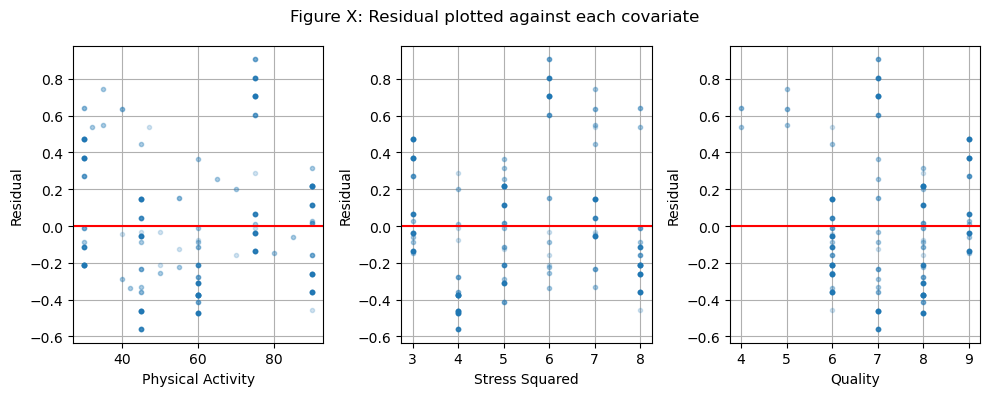

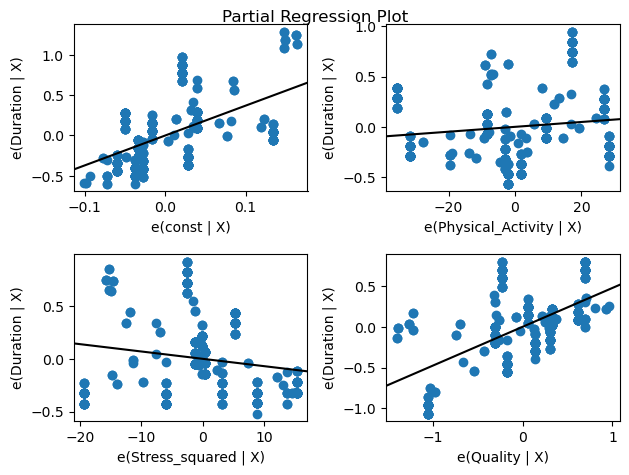

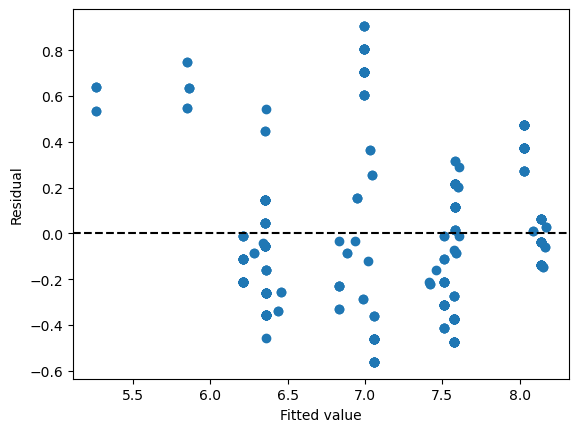

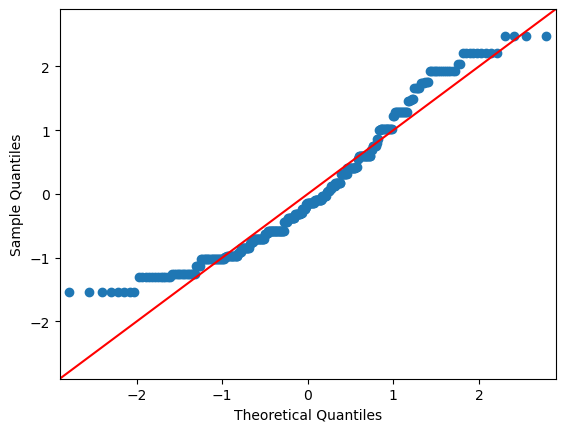

In [72]:
X = sleep[['Physical_Activity','Quality']]
X.insert(1, 'Stress_squared', stress_squared)
X = sm.add_constant(X)
reg = sm.OLS(Y, X).fit()
print(reg.summary())
sleep.head()

betas = reg.params
residuals = Y - (betas.iloc[0] + betas.iloc[1]*x1 + betas.iloc[2]*stress_squared + betas.iloc[3]*x3)

## residual covariate plot
fig, axes = plt.subplots(1, 3, figsize=(10,4))
residualPlot(axes[0], x1, 'Physical Activity')
residualPlot(axes[1], x2, 'Stress Squared')
residualPlot(axes[2], x3, 'Quality')

plt.suptitle('Figure X: Residual plotted against each covariate')
plt.tight_layout()
plt.show()

## partial regression plots
sm.graphics.plot_partregress_grid(reg)
plt.show()

fitted_y = reg.fittedvalues
residuals = reg.resid

plt.scatter(fitted_y,residuals)
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

residuals = reg.resid

sm.qqplot(residuals,fit=True, line="45")
plt.show()

## Natural Log of Quality

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     397.0
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          2.96e-115
Time:                        04:54:32   Log-Likelihood:                -175.50
No. Observations:                 374   AIC:                             359.0
Df Residuals:                     370   BIC:                             374.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.9659      0.64

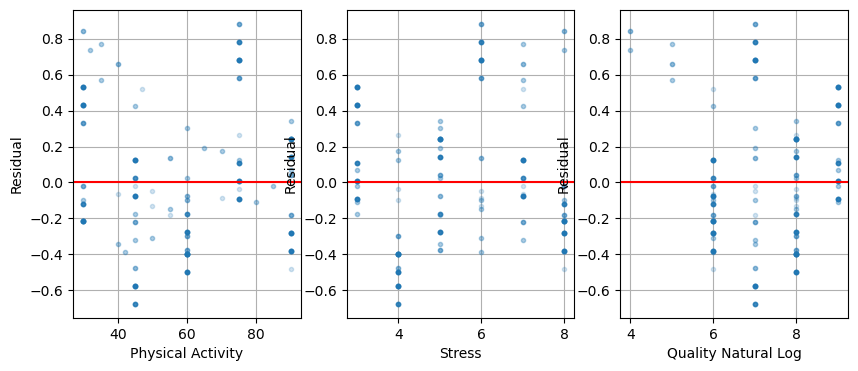

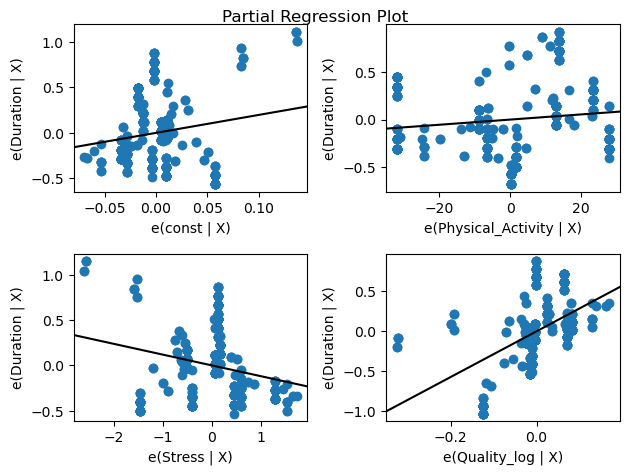

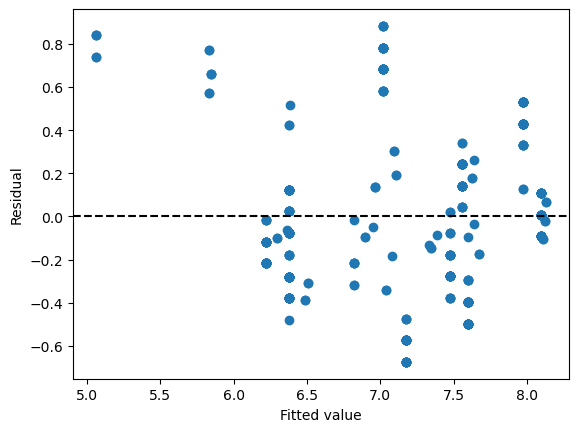

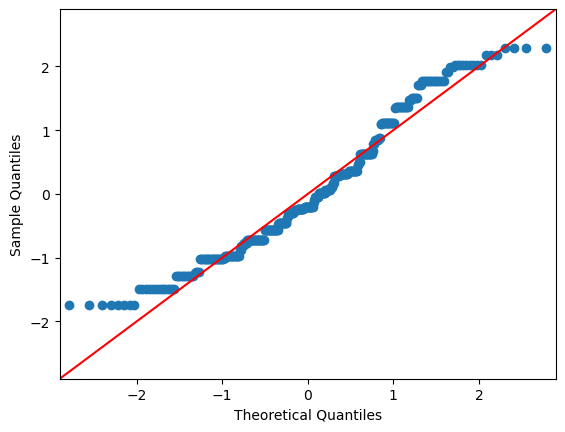

In [102]:
X = sleep[['Physical_Activity','Stress']]
X.insert(2, 'Quality_log', quality_log)
X = sm.add_constant(X)
reg = sm.OLS(Y, X).fit()
print(reg.summary())
sleep.head()

betas = reg.params
residuals = Y - (betas.iloc[0] + betas.iloc[1]*x1 + betas.iloc[2]*x2 + betas.iloc[3]*quality_log)

## residual covariate plot
fig, axes = plt.subplots(1, 3, figsize=(10,4))
residualPlot(axes[0], x1, 'Physical Activity')
residualPlot(axes[1], x2, 'Stress')
residualPlot(axes[2], x3, 'Quality Natural Log')

## partial regression plots
sm.graphics.plot_partregress_grid(reg)
plt.show()

fitted_y = reg.fittedvalues
residuals = reg.resid

plt.scatter(fitted_y,residuals)
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

residuals = reg.resid

sm.qqplot(residuals,fit=True, line="45")
plt.show()

## Quality squared

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     484.7
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          9.28e-128
Time:                        04:25:08   Log-Likelihood:                -146.38
No. Observations:                 374   AIC:                             300.8
Df Residuals:                     370   BIC:                             316.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.1598      0.26

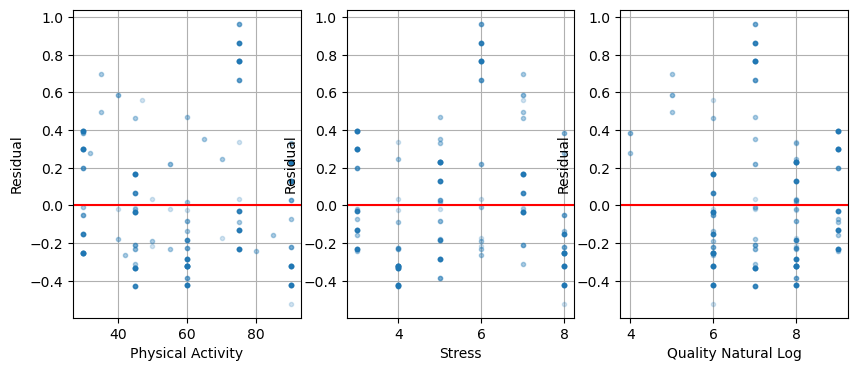

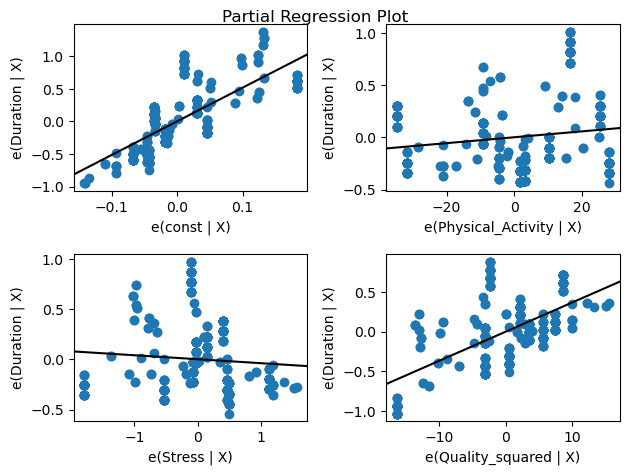

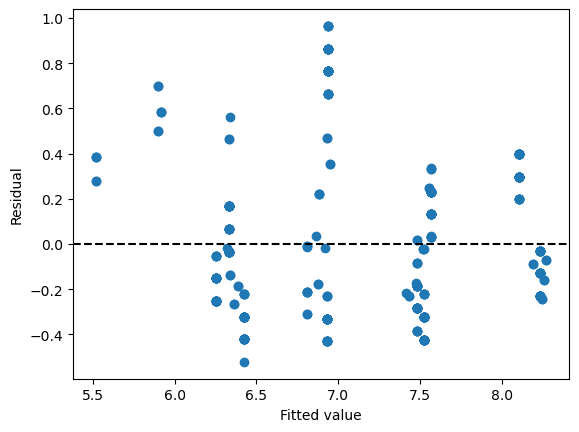

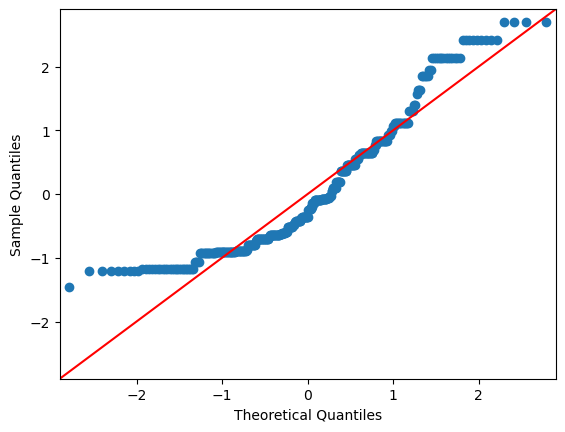

In [75]:
X = sleep[['Physical_Activity','Stress']]
X.insert(2, 'Quality_squared', quality_squared)
X = sm.add_constant(X)
reg = sm.OLS(Y, X).fit()
print(reg.summary())
sleep.head()

betas = reg.params
residuals = Y - (betas.iloc[0] + betas.iloc[1]*x1 + betas.iloc[2]*x2 + betas.iloc[3]*quality_squared)

## residual covariate plot
fig, axes = plt.subplots(1, 3, figsize=(10,4))
residualPlot(axes[0], x1, 'Physical Activity')
residualPlot(axes[1], x2, 'Stress')
residualPlot(axes[2], x3, 'Quality Natural Log')


## partial regression plots
sm.graphics.plot_partregress_grid(reg)
plt.show()

fitted_y = reg.fittedvalues
residuals = reg.resid

plt.scatter(fitted_y,residuals)
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

residuals = reg.resid

sm.qqplot(residuals,fit=True, line="45")
plt.show()

## Physical Activity Duration log

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     445.7
Date:                Sun, 30 Nov 2025   Prob (F-statistic):          1.94e-122
Time:                        22:22:16   Log-Likelihood:                -158.77
No. Observations:                 374   AIC:                             325.5
Df Residuals:                     370   BIC:                             341.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.29

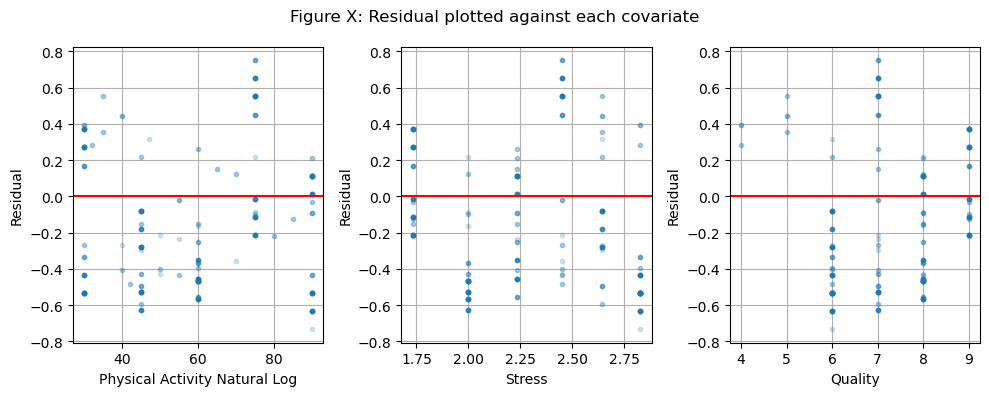

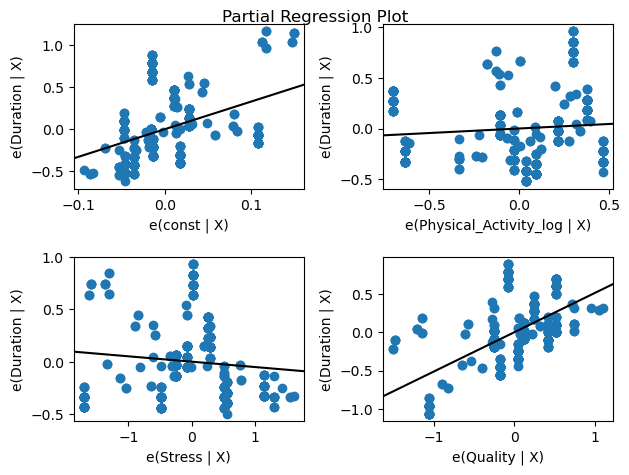

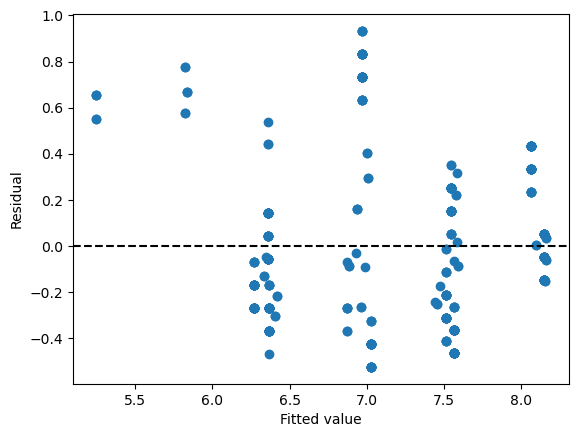

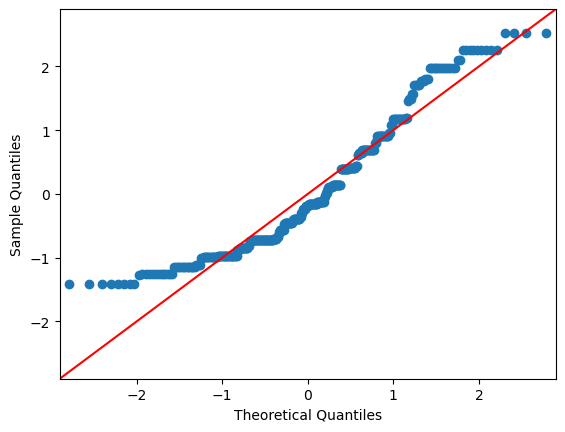

In [53]:
X = sleep[['Stress', 'Quality']]
X.insert(0, 'Physical_Activity_log', physical_log)
X = sm.add_constant(X)
reg = sm.OLS(Y, X).fit()
print(reg.summary())
sleep.head()

## residual covariate plots
betas = reg.params
residuals = Y - (betas.iloc[0] + betas.iloc[1]*physical_log + betas.iloc[2]*x2 + betas.iloc[3]*x3)
fig, axes = plt.subplots(1, 3, figsize=(10,4))
residualPlot(axes[0], x1, 'Physical Activity Natural Log')
residualPlot(axes[1], x2, 'Stress')
residualPlot(axes[2], x3, 'Quality')

plt.suptitle('Figure X: Residual plotted against each covariate')
plt.tight_layout()
plt.show()

## partial regression plots
sm.graphics.plot_partregress_grid(reg)
plt.show()

fitted_y = reg.fittedvalues
residuals = reg.resid

plt.scatter(fitted_y,residuals)
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

residuals = reg.resid

sm.qqplot(residuals,fit=True, line="45")
plt.show()

## Physical Activity Duration sqrt

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     448.0
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          9.16e-123
Time:                        04:29:16   Log-Likelihood:                -158.01
No. Observations:                 374   AIC:                             324.0
Df Residuals:                     370   BIC:                             339.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

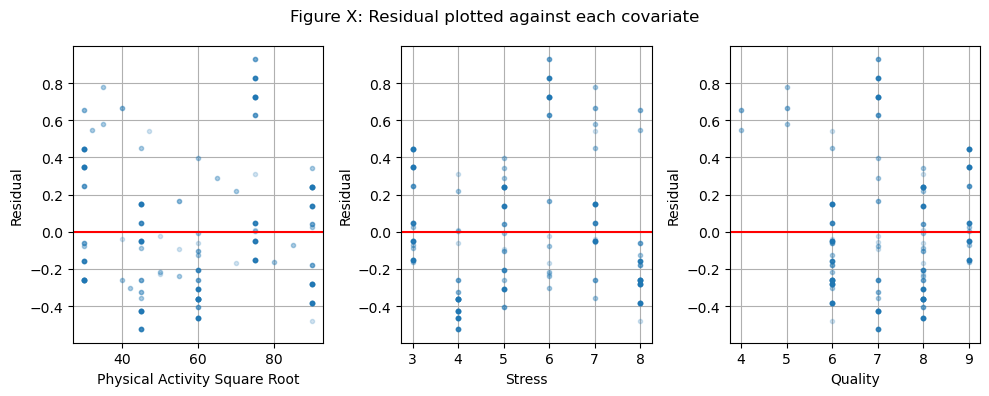

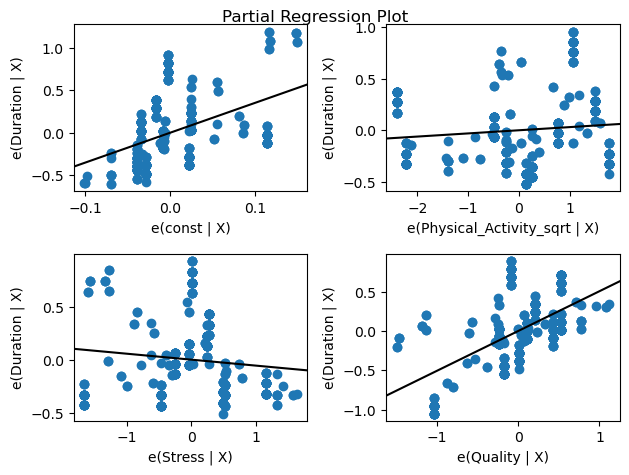

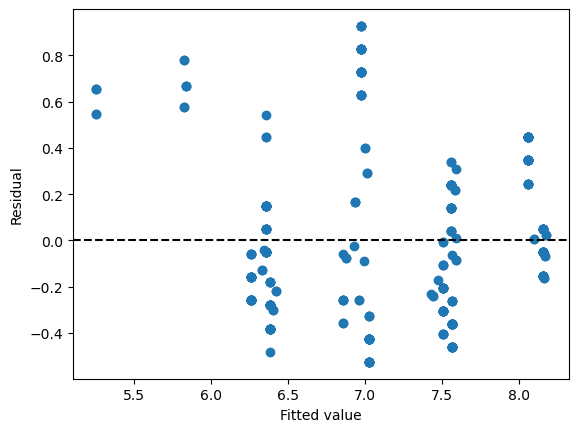

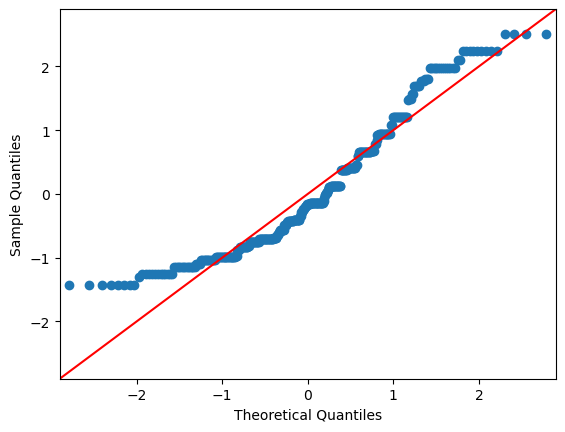

In [77]:
X = sleep[['Stress', 'Quality']]
X.insert(0, 'Physical_Activity_sqrt', physical_sqrt)
X = sm.add_constant(X)
reg = sm.OLS(Y, X).fit()
print(reg.summary())
sleep.head()

## residual covariate plots
betas = reg.params
residuals = Y - (betas.iloc[0] + betas.iloc[1]*physical_sqrt + betas.iloc[2]*x2 + betas.iloc[3]*x3)
fig, axes = plt.subplots(1, 3, figsize=(10,4))
residualPlot(axes[0], x1, 'Physical Activity Square Root')
residualPlot(axes[1], x2, 'Stress')
residualPlot(axes[2], x3, 'Quality')

plt.suptitle('Figure X: Residual plotted against each covariate')
plt.tight_layout()
plt.show()


## partial regression plots
sm.graphics.plot_partregress_grid(reg)
plt.show()

fitted_y = reg.fittedvalues
residuals = reg.resid

plt.scatter(fitted_y,residuals)
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

residuals = reg.resid

sm.qqplot(residuals,fit=True, line="45")
plt.show()

## Physical Activity Squared

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     454.6
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          1.11e-123
Time:                        04:38:22   Log-Likelihood:                -155.87
No. Observations:                 374   AIC:                             319.7
Df Residuals:                     370   BIC:                             335.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

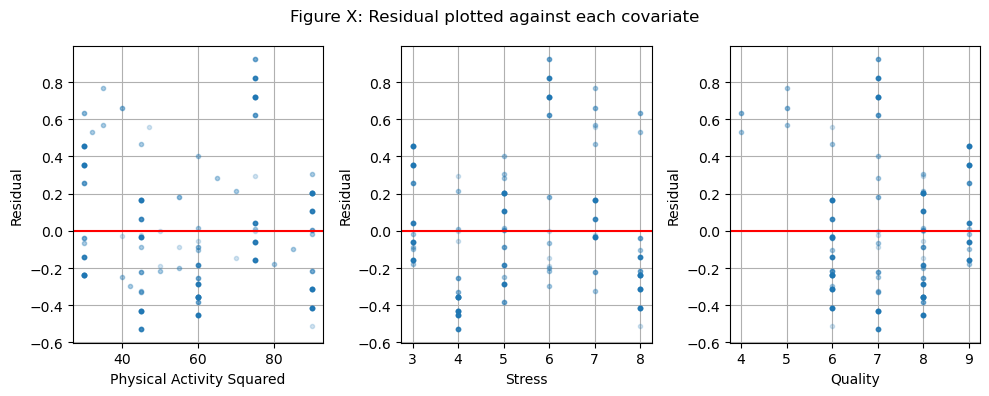

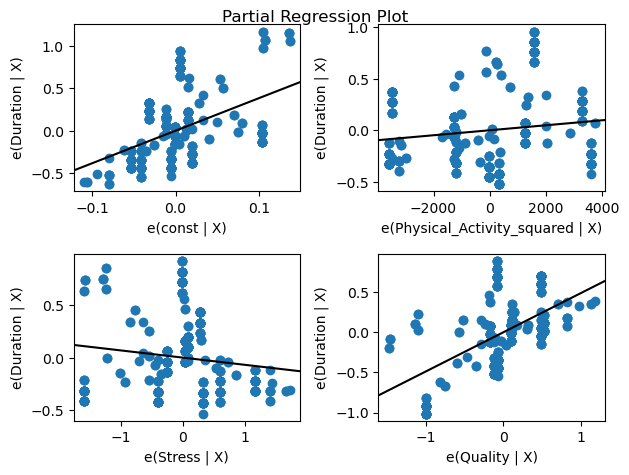

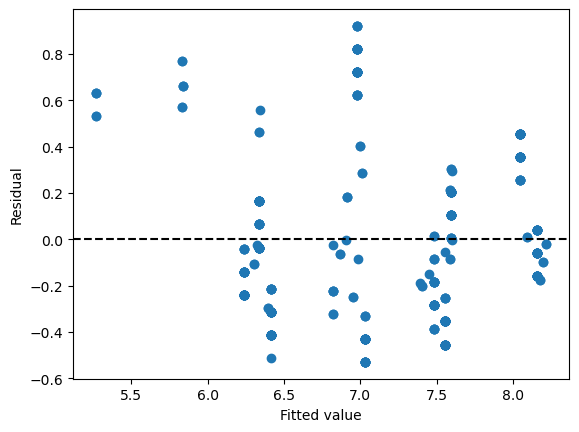

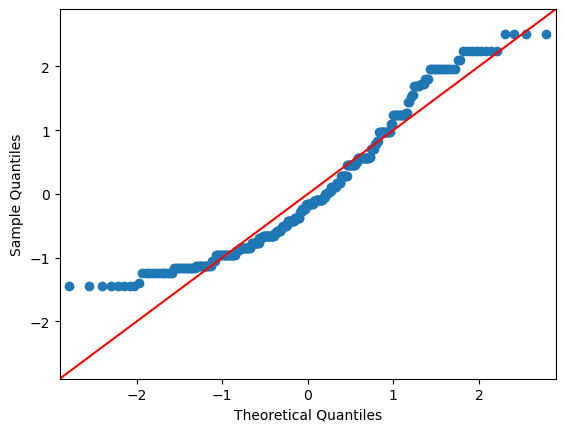

In [88]:
X = sleep[['Stress', 'Quality']]
X.insert(0, 'Physical_Activity_squared', physical_squared)
X = sm.add_constant(X)
reg = sm.OLS(Y, X).fit()
print(reg.summary())
sleep.head()

## residual covariate plots
betas = reg.params
residuals = Y - (betas.iloc[0] + betas.iloc[1]*physical_squared + betas.iloc[2]*x2 + betas.iloc[3]*x3)
fig, axes = plt.subplots(1, 3, figsize=(10,4))
residualPlot(axes[0], x1, 'Physical Activity Squared')
residualPlot(axes[1], x2, 'Stress')
residualPlot(axes[2], x3, 'Quality')

plt.suptitle('Figure X: Residual plotted against each covariate')
plt.tight_layout()
plt.show()


## partial regression plots
sm.graphics.plot_partregress_grid(reg)
plt.show()

fitted_y = reg.fittedvalues
residuals = reg.resid

plt.scatter(fitted_y,residuals)
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

residuals = reg.resid

sm.qqplot(residuals,fit=True, line="45")
plt.show()

## Sleep sqrt

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     459.3
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          2.41e-124
Time:                        04:43:45   Log-Likelihood:                 471.58
No. Observations:                 374   AIC:                            -935.2
Df Residuals:                     370   BIC:                            -919.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.0336      0.07

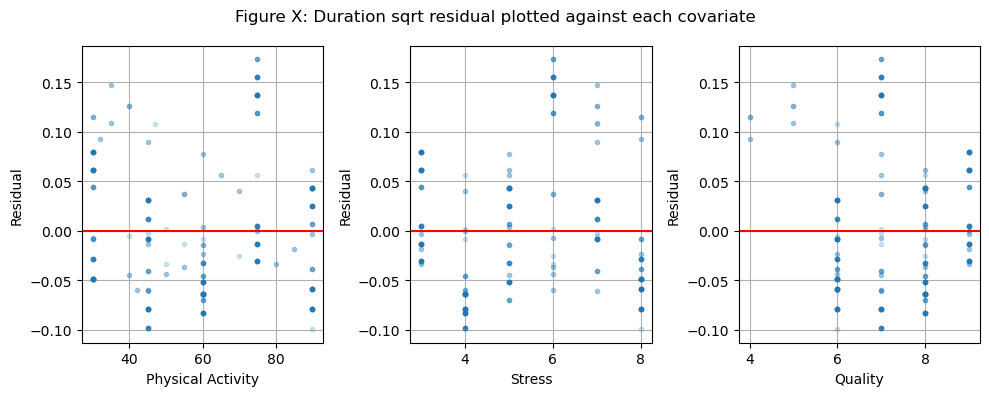

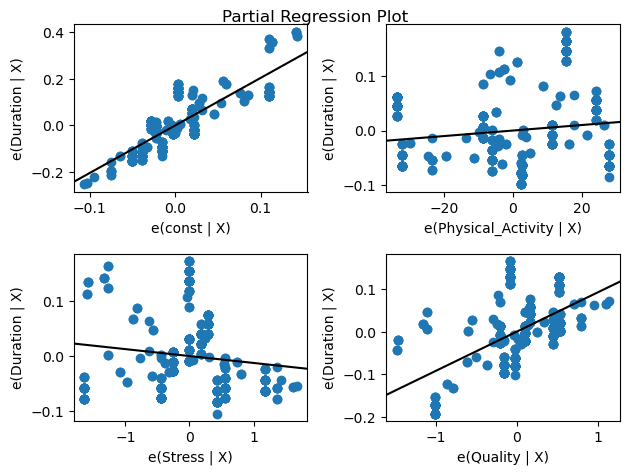

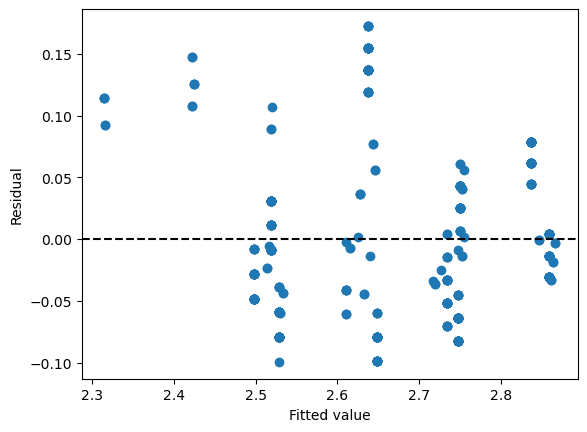

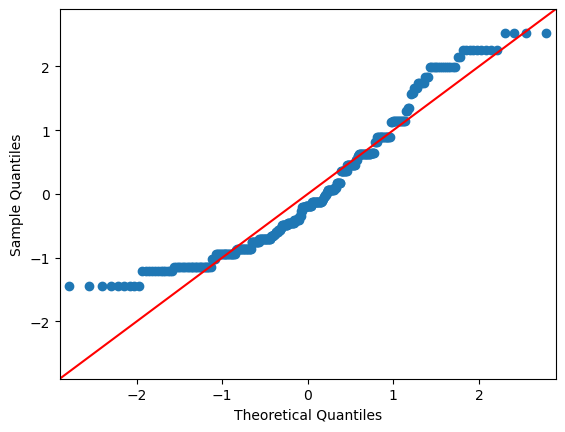

In [97]:
X = sleep[['Physical_Activity', 'Stress', 'Quality']]
Y_sqrt = np.sqrt(sleep['Duration'])
X = sm.add_constant(X)
reg = sm.OLS(Y_sqrt, X).fit()
print(reg.summary())
sleep.head()

## residual covariate plots
betas = reg.params
residuals = Y_sqrt - (betas.iloc[0] + betas.iloc[1]*x1 + betas.iloc[2]*x2 + betas.iloc[3]*x3)
fig, axes = plt.subplots(1, 3, figsize=(10,4))
residualPlot(axes[0], x1, 'Physical Activity')
residualPlot(axes[1], x2, 'Stress')
residualPlot(axes[2], x3, 'Quality')

plt.suptitle('Figure X: Duration sqrt residual plotted against each covariate')
plt.tight_layout()
plt.show()


## partial regression plots
sm.graphics.plot_partregress_grid(reg)
plt.show()

fitted_y = reg.fittedvalues
residuals = reg.resid

plt.scatter(fitted_y,residuals)
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

residuals = reg.resid

sm.qqplot(residuals,fit=True, line="45")
plt.show()

## Sleep natural log

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     466.6
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          2.44e-125
Time:                        04:43:50   Log-Likelihood:                 580.47
No. Observations:                 374   AIC:                            -1153.
Df Residuals:                     370   BIC:                            -1137.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.4950      0.05

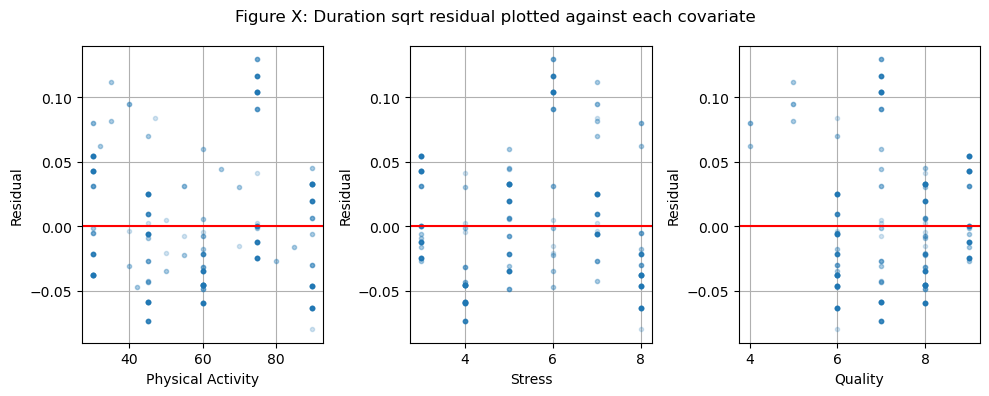

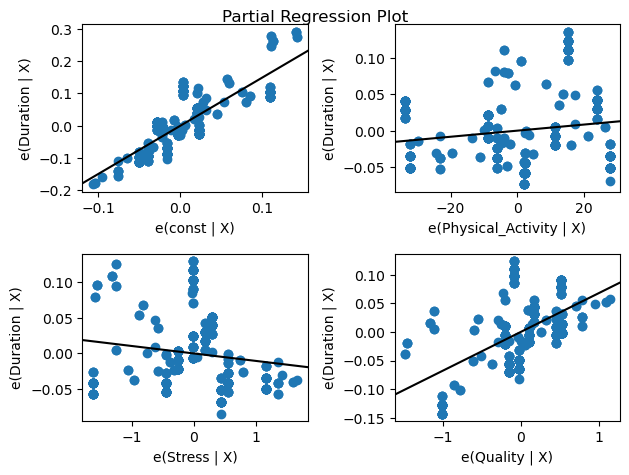

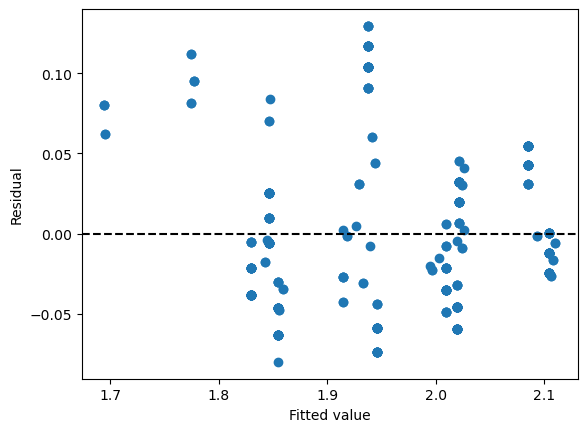

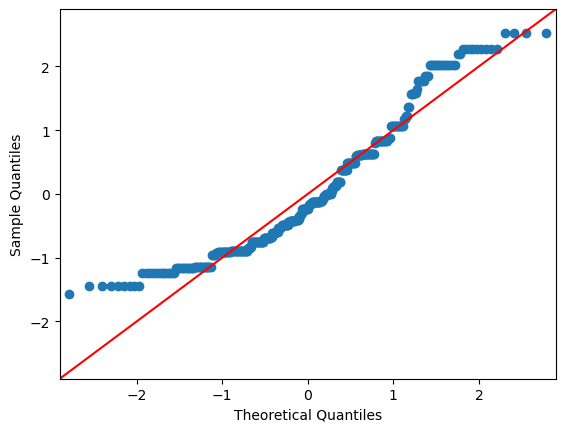

In [98]:
X = sleep[['Physical_Activity', 'Stress', 'Quality']]
Y_log = np.log(sleep['Duration'])
X = sm.add_constant(X)
reg = sm.OLS(Y_log, X).fit()
print(reg.summary())
sleep.head()

## residual covariate plots
betas = reg.params
residuals = Y_log - (betas.iloc[0] + betas.iloc[1]*x1 + betas.iloc[2]*x2 + betas.iloc[3]*x3)
fig, axes = plt.subplots(1, 3, figsize=(10,4))
residualPlot(axes[0], x1, 'Physical Activity')
residualPlot(axes[1], x2, 'Stress')
residualPlot(axes[2], x3, 'Quality')

plt.suptitle('Figure X: Duration sqrt residual plotted against each covariate')
plt.tight_layout()
plt.show()


## partial regression plots
sm.graphics.plot_partregress_grid(reg)
plt.show()

fitted_y = reg.fittedvalues
residuals = reg.resid

plt.scatter(fitted_y,residuals)
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

residuals = reg.resid

sm.qqplot(residuals,fit=True, line="45")
plt.show()

## Transformation

Stress^2, Quality^2, Physical Activity^2, Duration natural log

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     513.4
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          1.82e-131
Time:                        20:30:55   Log-Likelihood:                 594.74
No. Observations:                 374   AIC:                            -1181.
Df Residuals:                     370   BIC:                            -1166.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

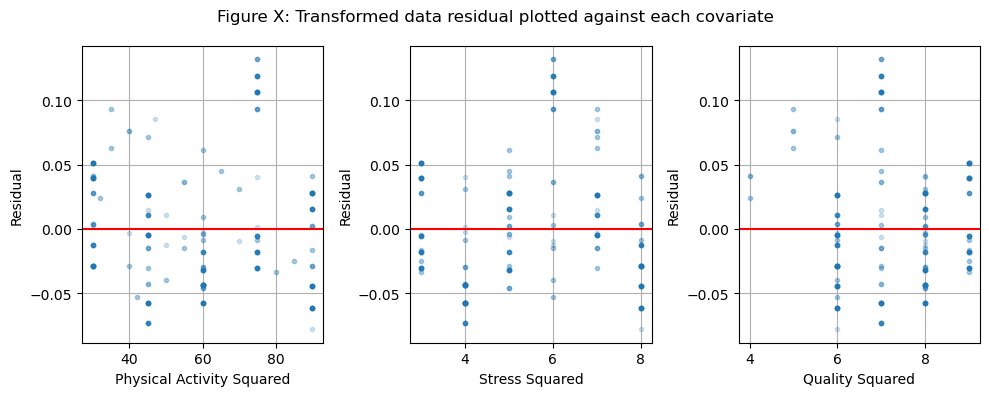

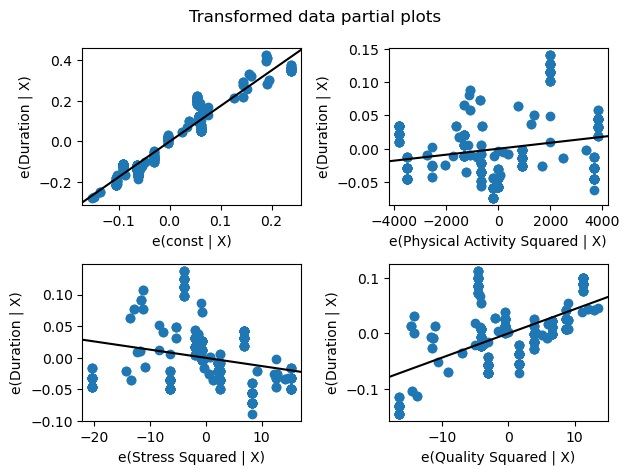

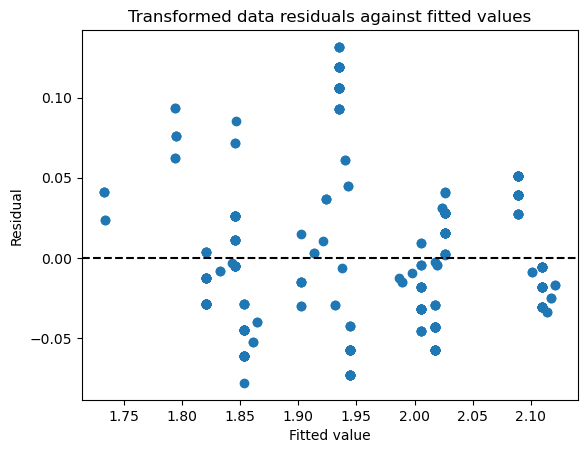

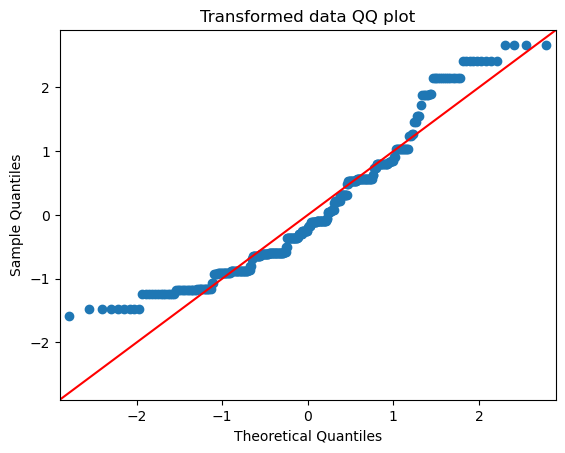

0.8047269776324301


In [7]:
X = pd.DataFrame()
X.insert(0, 'Physical Activity Squared', physical_squared)
X.insert(1, 'Stress Squared', stress_squared)
X.insert(2, 'Quality Squared', quality_squared)
Y_log = np.log(sleep['Duration'])
X = sm.add_constant(X)
reg = sm.OLS(Y_log, X).fit()
print(reg.summary())
sleep.head()

## residual covariate plots
betas = reg.params
residuals = Y_log - (betas.iloc[0] + betas.iloc[1]*physical_squared + betas.iloc[2]*stress_squared + betas.iloc[3]*quality_squared)
fig, axes = plt.subplots(1, 3, figsize=(10,4))
residualPlot(axes[0], x1, 'Physical Activity Squared')
residualPlot(axes[1], x2, 'Stress Squared')
residualPlot(axes[2], x3, 'Quality Squared')

plt.suptitle('Figure X: Transformed data residual plotted against each covariate')
plt.tight_layout()
plt.show()


## partial regression plots
sm.graphics.plot_partregress_grid(reg)
plt.suptitle('Transformed data partial plots')
plt.subplots_adjust(top=0.9)
plt.show()

fitted_y = reg.fittedvalues
residuals = reg.resid

plt.scatter(fitted_y,residuals)
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.title('Transformed data residuals against fitted values')
plt.show()

residuals = reg.resid

sm.qqplot(residuals,fit=True, line="45")
plt.title('Transformed data QQ plot')
plt.show()

print(reg.rsquared_adj)

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     437.7
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          2.63e-121
Time:                        04:56:51   Log-Likelihood:                 571.08
No. Observations:                 374   AIC:                            -1134.
Df Residuals:                     370   BIC:                            -1118.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

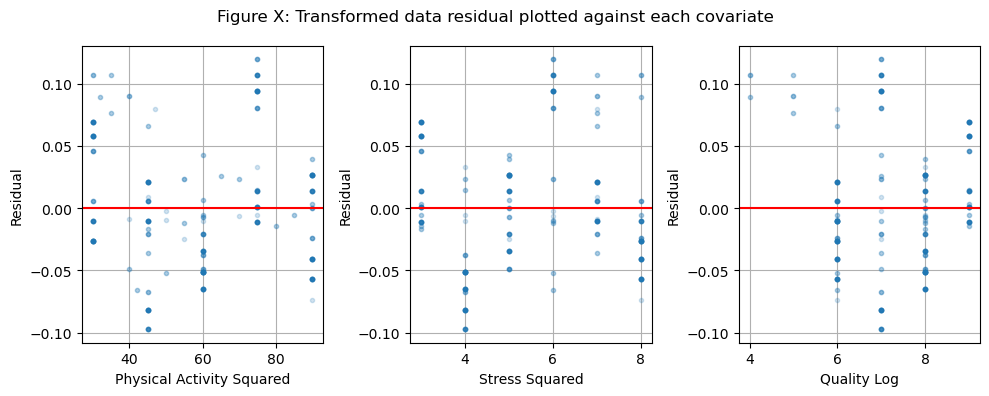

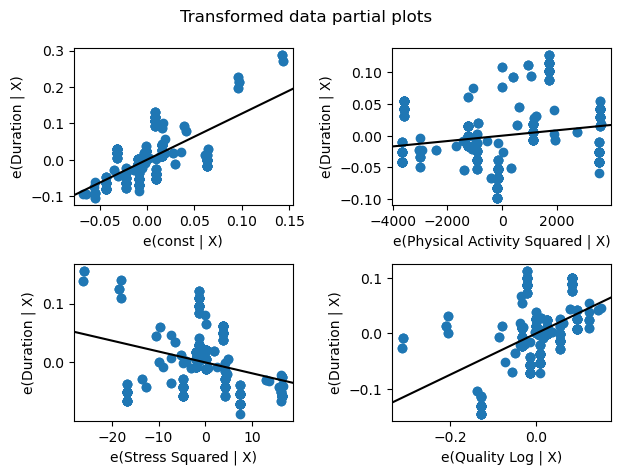

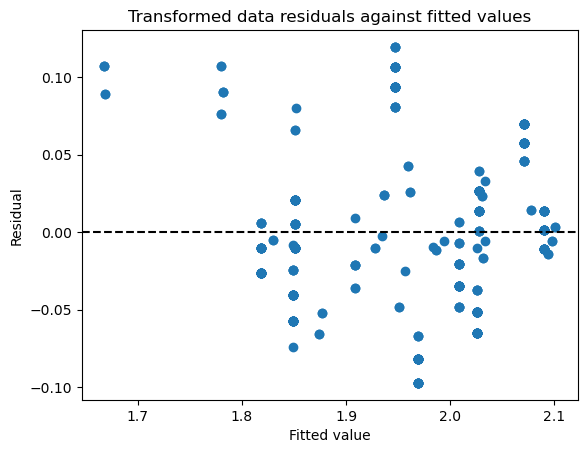

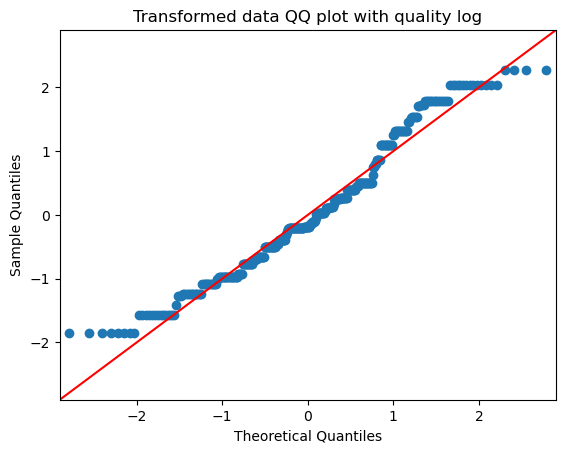

In [104]:
X = pd.DataFrame()
X.insert(0, 'Physical Activity Squared', physical_squared)
X.insert(1, 'Stress Squared', stress_squared)
X.insert(2, 'Quality Log', quality_log)
Y_log = np.log(sleep['Duration'])
X = sm.add_constant(X)
reg = sm.OLS(Y_log, X).fit()
print(reg.summary())
sleep.head()

## residual covariate plots
betas = reg.params
residuals = Y_log - (betas.iloc[0] + betas.iloc[1]*physical_squared + betas.iloc[2]*stress_squared + betas.iloc[3]*quality_log)
fig, axes = plt.subplots(1, 3, figsize=(10,4))
residualPlot(axes[0], x1, 'Physical Activity Squared')
residualPlot(axes[1], x2, 'Stress Squared')
residualPlot(axes[2], x3, 'Quality Log')

plt.suptitle('Figure X: Transformed data residual plotted against each covariate')
plt.tight_layout()
plt.show()


## partial regression plots
sm.graphics.plot_partregress_grid(reg)
plt.suptitle('Transformed data partial plots')
plt.subplots_adjust(top=0.9)
plt.show()

fitted_y = reg.fittedvalues
residuals = reg.resid

plt.scatter(fitted_y,residuals)
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.title('Transformed data residuals against fitted values')
plt.show()

residuals = reg.resid

sm.qqplot(residuals,fit=True, line="45")
plt.title('Transformed data QQ plot with quality log')
plt.show()

# Analysis and Assessment: